In [1]:
%run ../python_files/aux_funcs.py
%run ../python_files/RSRG_bdry_class.py
%run ../python_files/bdry_aux_funcs.py
#from iminuit import cost, Minuit

In [9]:
a_mat = np.array([[0.1, 0.1],[0.1, 0.1]])
b_mat = np.array([[0.105, 0.105],[0.105, 0.105]])
w_mat = np.array([[2.8, 2.8],[2.8, 2.8]])

L = 60
steps = int(0.99*L*L)


ind_dict, adj_ind, bdry_dict = triangle_lattice_boundary_dictionary(L)

check_list = gen_check_list(L*L, steps, 20)       #Indices at which the distribution of couplings is measured
measure_list = gen_check_list(L*L, steps, 50)

J_dist_list_blk = [np.array([]) for i in range(20)]
h_dist_list_blk = [np.array([]) for i in range(20)]

J_dist_list_bdry = [np.array([]) for i in range(20)]
h_dist_list_bdry = [np.array([]) for i in range(20)]

In [10]:
J_ij_vals = fill_J_ij_bdry(L*L, bdry_dict, adj_ind, a_mat, b_mat, w_mat)
h_vals = fill_h_vals_bdry(L*L, bdry_dict, 1.,1.)
test = boundary_system(L*L, adj_ind, bdry_dict, J_ij_vals, h_vals)
check_list_acc = 0

for i in range(steps+1):
    if i in check_list:
        h_remain_blk = test.h_vals[~bdry_dict]
        h_remain_blk = h_remain_blk[h_remain_blk!=0]
        
        h_remain_bdry = test.h_vals[bdry_dict]
        h_remain_bdry = h_remain_bdry[h_remain_bdry!=0]
        
        h_dist_list_bdry[check_list_acc] = np.concatenate((h_dist_list_bdry[check_list_acc],-np.log(h_remain_bdry/test.Omega)))
        h_dist_list_blk[check_list_acc] = np.concatenate((h_dist_list_blk[check_list_acc],-np.log(h_remain_blk/test.Omega)))
        
        check_list_acc+=1
    test.decimate()

/home/jebediah/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in _cdf_single (vectorized)
  outputs = ufunc(*inputs)
/home/jebediah/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


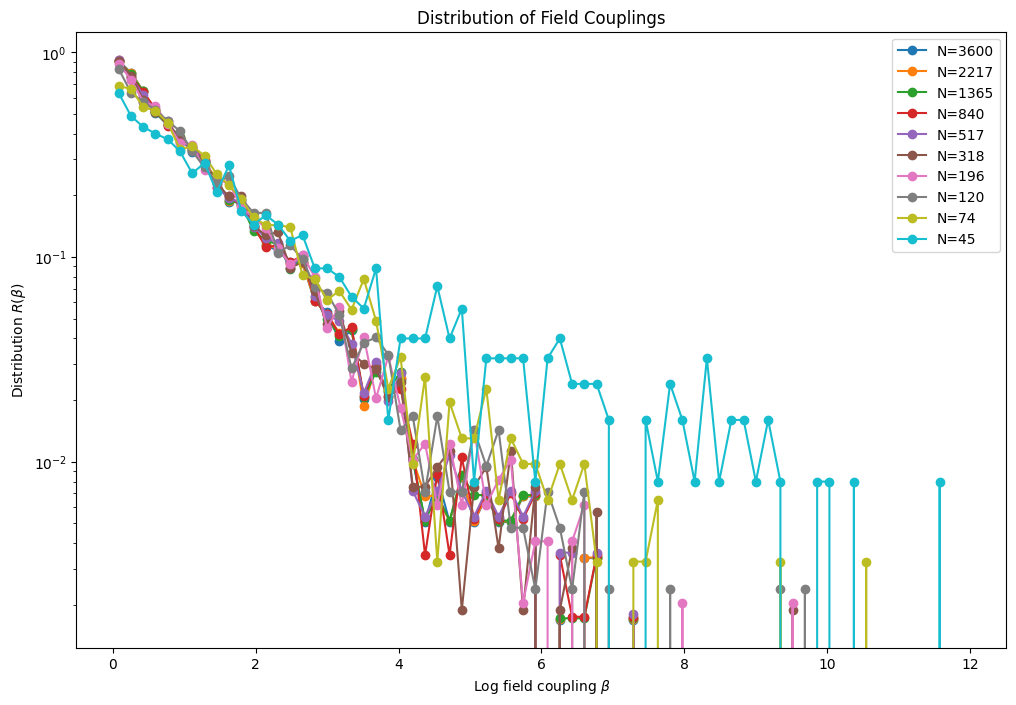

In [11]:
n_bins_h = 70
width_list = []
plt.figure(figsize=(12, 8))

for i,step in enumerate(check_list[:-1]): 
    n,bins = np.histogram(h_dist_list_blk[i], density=True, bins = n_bins_h, range=(0,12))
    width = bins[1]-bins[0]
    x = (bins[1:]-width/2)
    y = n
    if i%2==0: plt.plot(x, y, label="N="+str(step), marker='o')

    popt, pcov = curve_fit(exponential_dist_norm, x[:20], y[:20])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    width_list.append(1/popt[0])

plt.yscale('log')
#plt.xlim(0, 6)
#plt.ylim(1e-1, 1)

plt.xlabel(r"Log field coupling $\beta$")
plt.ylabel(r"Distribution $R(\beta)$")
plt.title("Distribution of Field Couplings")
#plt.yscale('log')
plt.legend()

[0.33903829 5.74006916]


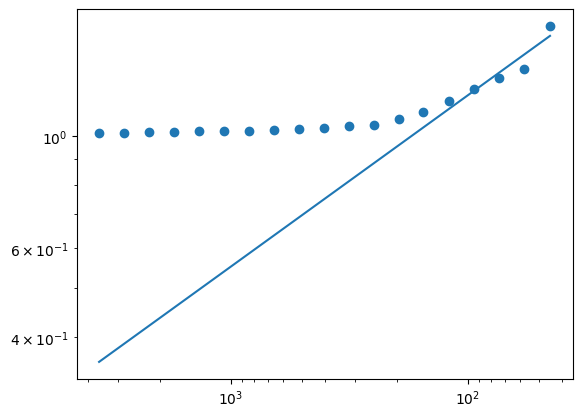

In [13]:
plt.scatter(check_list[:-1], width_list)
x = check_list[:-1]

popt, pcov = curve_fit(power_law_scale, x[-5:], width_list[-5:])
plt.plot(x, power_law_scale(x, *popt))
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
print(popt)

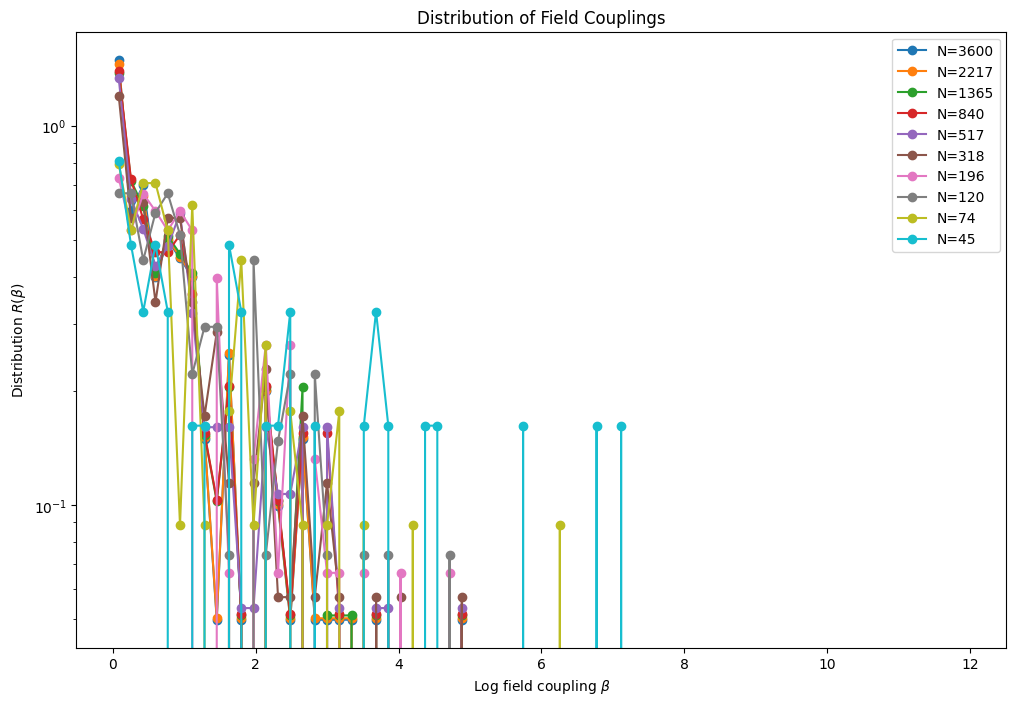

In [14]:
n_bins_h = 70
width_list = []
plt.figure(figsize=(12, 8))

for i,step in enumerate(check_list[:-1]): 
    n,bins = np.histogram(h_dist_list_bdry[i], density=True, bins = n_bins_h, range=(0,12))
    width = bins[1]-bins[0]
    x = (bins[1:]-width/2)
    y = n
    if i%2==0: plt.plot(x, y, label="N="+str(step), marker='o')

    popt, pcov = curve_fit(exponential_dist_norm, x[:20], y[:20])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    width_list.append(1/popt[0])

plt.yscale('log')
#plt.xlim(0, 6)
#plt.ylim(1e-1, 1)

plt.xlabel(r"Log field coupling $\beta$")
plt.ylabel(r"Distribution $R(\beta)$")
plt.title("Distribution of Field Couplings")
#plt.yscale('log')
plt.legend()

[0.26767577 4.18491729]


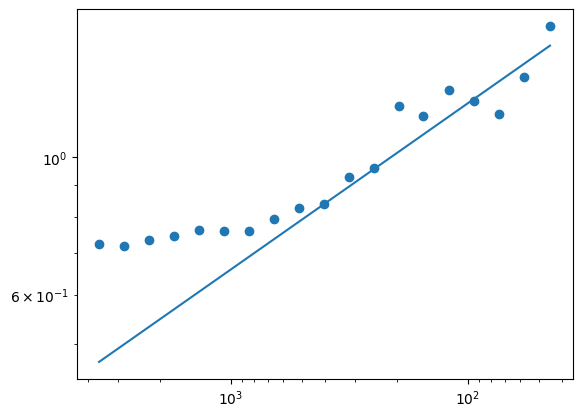

In [15]:
plt.scatter(check_list[:-1], width_list)
x = check_list[:-1]

popt, pcov = curve_fit(power_law_scale, x[-5:], width_list[-5:])
plt.plot(x, power_law_scale(x, *popt))
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
print(popt)